In [7]:
import os
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import shap
from skimage.segmentation import mark_boundaries

In [8]:
model = VGG16(weights='imagenet', include_top=True)

('n02138441', 'meerkat', 0.8831381)
('n02137549', 'mongoose', 0.11685845)
('n02361337', 'marmot', 1.32906e-06)
('n01518878', 'ostrich', 9.908773e-07)
('n02447366', 'badger', 4.4259448e-07)


array([142, 141, 140, 135,  83])

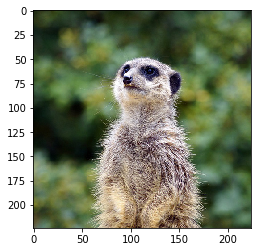

In [9]:
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]
plt.imshow(to_explain[1].astype("int64"))
preds = model.predict(to_explain)
for x in decode_predictions(preds)[1]:
    print(x)
model.predict(to_explain).argsort()[0, -5:][::-1] 

('n02033041', 'dowitcher', 0.9874993)
('n02028035', 'redshank', 0.011582168)
('n02027492', 'red-backed_sandpiper', 0.0005842545)
('n02013706', 'limpkin', 0.00025794836)
('n01798484', 'prairie_chicken', 2.6145966e-05)


array([142, 141, 140, 135,  83])

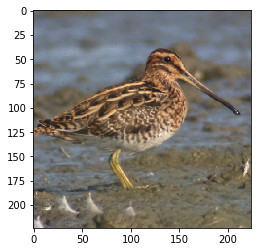

In [10]:
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]
plt.imshow(to_explain[0].astype("int64"))
preds = model.predict(to_explain)
for x in decode_predictions(preds)[0]:
    print(x)
model.predict(to_explain).argsort()[0, -5:][::-1] 

In [11]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [12]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(to_explain[0], model.predict, top_labels=5, num_samples=100)

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask).astype("int64"))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp , mask).astype("int64"))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask).astype("int64"))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask).astype("int64"))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask).astype("int64"))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask).astype("int64"))

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(to_explain[1], model.predict, top_labels=5, num_samples=100)

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask).astype("int64"))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp , mask).astype("int64"))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp , mask).astype("int64"))